In [1]:
import pandas as pd

data_path = "data/citybike-ts.csv"
df = pd.read_csv(data_path)

df["weather_main"].unique()

array(['Rain', 'Clear', 'Clouds', 'Mist', 'Haze', 'Snow', 'Drizzle',
       'Smoke', 'Thunderstorm', 'Fog'], dtype=object)

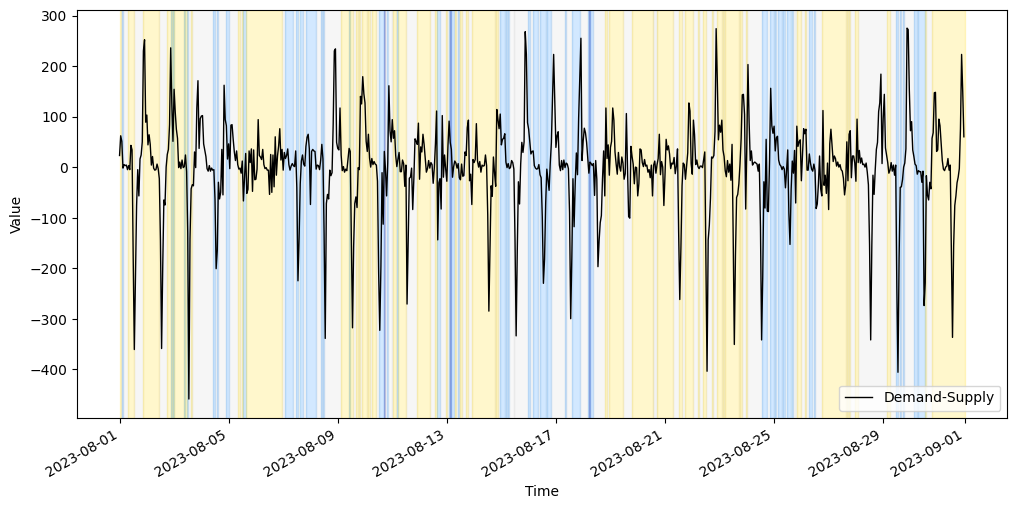

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

df['time'] = pd.to_datetime(df['time'], utc=True)
df['label'] = df['demand'] - df['supply']

zone_id = 27
month = 8

df_filtered = df[(df['zone_id'] == zone_id) &
                 (df['time'].dt.year == 2023) &
                 (df['time'].dt.month == month)].copy()

# rank according to timestamp
df_filtered.sort_values('time', inplace=True)
df_filtered.reset_index(drop=True, inplace=True)

weather_color_map = {
    'Rain': 'dodgerblue',
    'Drizzle': 'lightskyblue',
    'Thunderstorm': 'darkblue',
    'Clear': 'gold',
    'Clouds': 'lightgrey',
    'Mist': 'gainsboro',
    'Haze': 'beige',
    'Snow': 'aliceblue',
    'Smoke': 'silver',
    'Fog': 'lavender'
}

fig, ax = plt.subplots(figsize=(12, 6))

if not df_filtered.empty:
    segment_start_idx = 0

    for i in range(1, len(df_filtered)):
        # when weather change color the section
        if df_filtered.loc[i, 'weather_main'] != df_filtered.loc[i - 1, 'weather_main']:
            segment = df_filtered.loc[segment_start_idx:i - 1]
            weather = segment.iloc[0]['weather_main']
            start_time = segment.iloc[0]['time']
            end_time = segment.iloc[-1]['time'] + pd.Timedelta(hours=1)
            color = weather_color_map.get(weather, 'white')
            ax.axvspan(start_time, end_time, color=color, alpha=0.2)
            segment_start_idx = i

    # last section
    segment = df_filtered.loc[segment_start_idx:]
    weather = segment.iloc[0]['weather_main']
    start_time = segment.iloc[0]['time']
    end_time = segment.iloc[-1]['time'] + pd.Timedelta(hours=1)
    color = weather_color_map.get(weather, 'white')
    ax.axvspan(start_time, end_time, color=color, alpha=0.2)

ax.plot(df_filtered['time'], df_filtered['label'], label='Demand-Supply', color='black', linewidth=1)

ax.set_xlabel('Time')
ax.set_ylabel('Value')
ax.legend()

fig.autofmt_xdate()

plt.savefig('time_series_demand-supply.pdf', format='pdf', bbox_inches='tight')

plt.show()

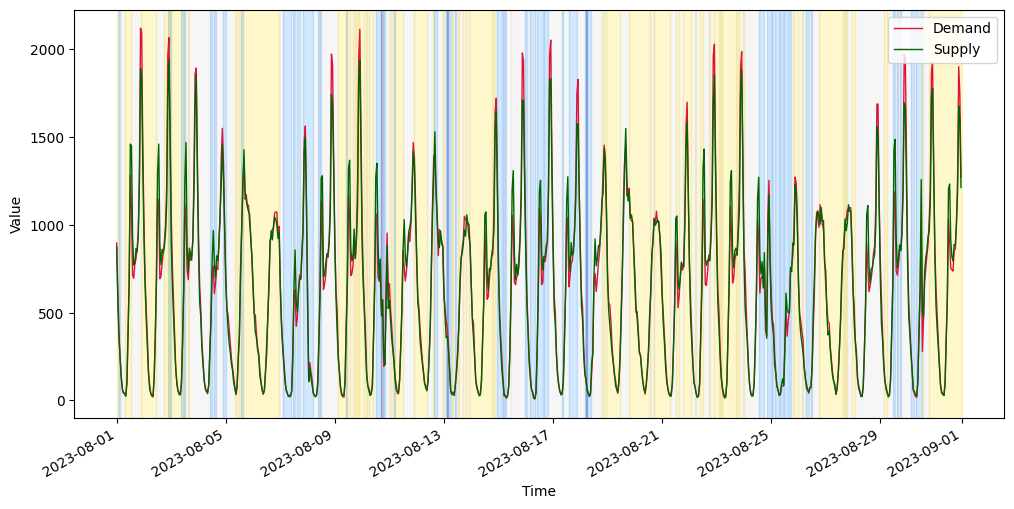

In [3]:
fig, ax = plt.subplots(figsize=(12, 6))

if not df_filtered.empty:
    segment_start_idx = 0

    for i in range(1, len(df_filtered)):
        if df_filtered.loc[i, 'weather_main'] != df_filtered.loc[i - 1, 'weather_main']:
            segment = df_filtered.loc[segment_start_idx:i - 1]
            weather = segment.iloc[0]['weather_main']
            start_time = segment.iloc[0]['time']
            end_time = segment.iloc[-1]['time'] + pd.Timedelta(hours=1)
            color = weather_color_map.get(weather, 'white')
            ax.axvspan(start_time, end_time, color=color, alpha=0.2)
            segment_start_idx = i

    segment = df_filtered.loc[segment_start_idx:]
    weather = segment.iloc[0]['weather_main']
    start_time = segment.iloc[0]['time']
    end_time = segment.iloc[-1]['time'] + pd.Timedelta(hours=1)
    color = weather_color_map.get(weather, 'white')
    ax.axvspan(start_time, end_time, color=color, alpha=0.2)

ax.plot(df_filtered['time'], df_filtered['demand'], label='Demand', color='crimson', linewidth=1)
ax.plot(df_filtered['time'], df_filtered['supply'], label='Supply', color='darkgreen', linewidth=1)

ax.set_xlabel('Time')
ax.set_ylabel('Value')
ax.legend()

fig.autofmt_xdate()

plt.savefig('time_series_demand_and_supply.pdf', format='pdf', bbox_inches='tight')

plt.show()